<a href="https://colab.research.google.com/github/girijeshcse/autovision/blob/vijay/Capstone_Project_Madeti_Vijayabhargava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# import needed libraries
import os as os
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
project_path = ('/content/drive/My Drive/Great Learning Capstone project/')

In [89]:
train_annotations=pd.read_csv('/content/drive/My Drive/Great Learning Capstone project/Train Annotations.csv')
test_annotations=pd.read_csv(os.path.join(project_path,'Test Annotation.csv'))
cars = pd.read_csv('/content/drive/My Drive/Great Learning Capstone project/Car names and make.csv', header =  None)

In [90]:
cars.head()

,0
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [92]:
cars.value_counts().sum()

196

In [93]:
train_annotations.head()

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [94]:
test_annotations.head()

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [95]:
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [96]:
test_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [97]:
cars.shape

(196, 1)

In [98]:
cars.head(10)

,0
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
5,Acura Integra Type R 2001
6,Acura ZDX Hatchback 2012
7,Aston Martin V8 Vantage Convertible 2012
8,Aston Martin V8 Vantage Coupe 2012
9,Aston Martin Virage Convertible 2012


In [99]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [100]:
train_annotations['Image class'].max(), test_annotations['Image class'].max()

(196, 196)

In [101]:
train_annotations.rename(columns={'Bounding Box coordinates': 'x0', 'Unnamed: 2': 'y0','Unnamed: 3': 'x1','Unnamed: 4': 'y1'}, inplace=True)

In [102]:
test_annotations.rename(columns={'Bounding Box coordinates': 'x0', 'Unnamed: 2': 'y0','Unnamed: 3': 'x1','Unnamed: 4': 'y1'}, inplace=True)

In [103]:
trainsetpath = '/content/drive/My Drive/Great Learning Capstone project/Train Images-20211114T094400Z-001/Train Images/'
trainset = os.listdir(trainsetpath)

In [104]:
trainset

['.DS_Store',
 'Acura TSX Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura Integra Type R 2001',
 'Acura TL Sedan 2012',
 'Acura RL Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'AM General Hummer SUV 2000',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Audi A5 Coupe 2012',
 'Audi 100 Sedan 1994',
 'Aston Martin Virage Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi 100 Wagon 1994',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi TT Hatchback 2011',
 'Audi TTS Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT RS Coupe 2012',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental GT Coupe 2012',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'Bentley Mulsanne Sedan 2011',
 'BMW 3 Series Sedan

In [105]:
import cv2

In [106]:
pathToCarImages = '/content/drive/My Drive/Great Learning Capstone project/Train Images-20211114T094400Z-001/Train Images/'
listing = os.listdir( pathToCarImages)
num_folders = len(listing)
print ( num_folders)
CarImagesArray = [[]]
CarImagesPaths = []
CarImagesCategories = []
CarImages = []
CarImagesName = []
t0=time.time()

for imgFolder in listing:
  #print(imgFolder)
  path = pathToCarImages + imgFolder
  if os.path.isdir(path):
    files = os.listdir(path)
    for imgFile in files:
      imgPath = path + '/' + imgFile
      CarImages.append(cv2.imread(imgPath, cv2.COLOR_BGR2RGB)) # images
      CarImagesArray.append([imgPath, imgFolder]) # image path, image folder
      CarImagesPaths.append(imgPath) # paths to images
      CarImagesCategories.append(imgFolder) # labels
      CarImagesName.append(imgFile) # Image name

197


In [107]:
len(pd.DataFrame(CarImagesCategories)[0].unique())

196

In [108]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(CarImagesCategories).value_counts())

GMC Savana Van 2012                                       68
Chrysler 300 SRT-8 2010                                   49
Mercedes-Benz 300-Class Convertible 1993                  48
Mitsubishi Lancer Sedan 2012                              48
Jaguar XK XKR 2012                                        47
Chevrolet Corvette ZR1 2012                               47
Suzuki Kizashi Sedan 2012                                 46
Mercedes-Benz C-Class Sedan 2012                          46
Nissan 240SX Coupe 1998                                   46
Ford GT Coupe 2006                                        46
Dodge Durango SUV 2007                                    46
Eagle Talon Hatchback 1998                                46
Bentley Continental GT Coupe 2007                         46
Volvo 240 Sedan 1993                                      46
Volkswagen Golf Hatchback 1991                            46
Audi S6 Sedan 2011                                        46
Chevrolet Avalanche Crew

In [109]:
CarImages[3].shape

(768, 1024, 3)

In [110]:
CarImages[6].shape

(199, 300, 3)

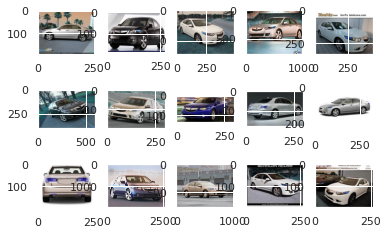

In [111]:
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(CarImages[i])

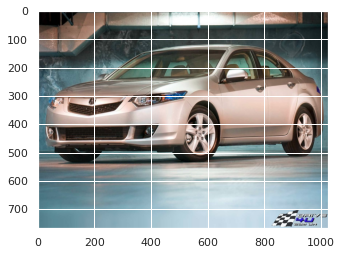

In [112]:
plt.imshow(CarImages[3])

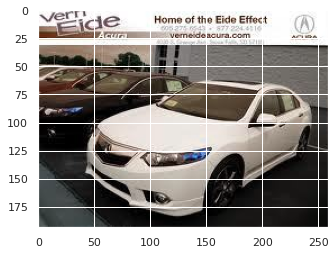

In [113]:
plt.imshow(CarImages[14])

Label:
Acura TSX Sedan 2012


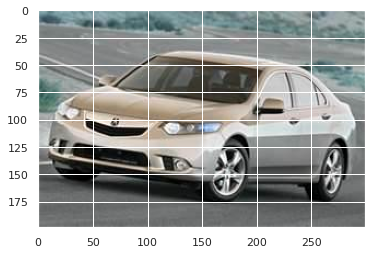

In [114]:
print('Label:')
print(CarImagesCategories[6])
plt.imshow(CarImages[6])

In [115]:
CarImagesPaths[0] # paths to image

'/content/drive/My Drive/Great Learning Capstone project/Train Images-20211114T094400Z-001/Train Images/Acura TSX Sedan 2012/05128.jpg'

In [118]:
train_annotations[train_annotations['Image Name']=='01034.jpg']

,Image Name,x0,y0,x1,y1,Image class
1033,01034.jpg,115,63,817,324,2


In [119]:
testimage = cv2.imread(CarImagesPaths[0])
cv2.rectangle(testimage,(115,63),(817,324),(0,255,0),2) # add rectangle to image

array([[[63, 52, 44],
        [63, 52, 44],
        [92, 81, 73],
        ...,
        [68, 59, 45],
        [67, 60, 45],
        [67, 60, 45]],

       [[79, 66, 58],
        [72, 60, 50],
        [69, 56, 48],
        ...,
        [69, 60, 46],
        [69, 61, 44],
        [69, 60, 46]],

       [[81, 64, 55],
        [76, 60, 48],
        [87, 70, 61],
        ...,
        [66, 53, 37],
        [66, 54, 36],
        [66, 53, 37]],

       ...,

       [[46, 49, 47],
        [32, 35, 33],
        [36, 37, 33],
        ...,
        [63, 66, 70],
        [62, 68, 67],
        [62, 68, 67]],

       [[35, 37, 37],
        [43, 45, 45],
        [48, 51, 49],
        ...,
        [59, 62, 66],
        [59, 63, 64],
        [59, 63, 64]],

       [[31, 33, 33],
        [35, 37, 37],
        [34, 36, 36],
        ...,
        [59, 63, 64],
        [59, 63, 64],
        [59, 63, 64]]], dtype=uint8)

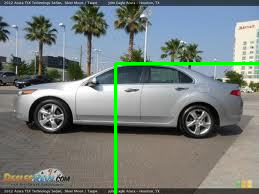

In [128]:
from google.colab.patches import cv2_imshow
cv2_imshow(testimage)